# About My Bookstore Notebook

This notebook is like a little tour of a virtual bookstore. Its just a fun, simple look into reader habits around the world.

You can find answers to questions like:

- What are the most loved books?
- Who are the readers? Were are they from and how old are they?
- Which authors are popular with different age groups?
- Do different countries enjoy the same books?

Need a book suggestion? There’s even a mini book recommender. 


## Libraries

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt
from IPython.display import Image, display

## 1. Loading Data
Books, Users & Ratings

In [33]:
books = pd.read_csv("Books.csv", encoding='latin-1', delimiter=';')
users = pd.read_csv("Users.csv", encoding='latin-1',delimiter=';')
ratings = pd.read_csv("Book-Ratings.csv", encoding='latin-1', delimiter=';')

# using delimiter=';' because the file uses semicolons instead of commas
# using encoding='latin-1' so Pandas doesn't crash when it sees special characters in the text

## 2. Getting to Know the Data Tables

#### Exploring the shape of data to see number of entries in each table

In [34]:
# exploring the sahape of data to indetify no of entries 
print("Books:", books.shape[0], "entries")
print("Users:", users.shape[0], "entries")
print("Ratings:",ratings.shape[0], "ratings")

Books: 271379 entries
Users: 278858 entries
Ratings: 1149780 ratings


#### Having a closer look at tables to understand the structure and columns  

In [35]:
print("\nBooks\n")
books.head(3)


Books



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [36]:
print("\nUsers\n")
users.head(5)


Users



,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [37]:
print("\nRatings\n")
ratings


Ratings



,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


## 3. Looking for Missing or Messy Data

#### Missing Values

In [38]:
print("\nBooks:", books.isna().sum().sum(), "missing values")
print("Users:", users.isna().sum().sum(), "missing values")
print("Ratings:", ratings.isna().sum().sum(), "missing values\n")


Books: 4 missing values
Users: 110762 missing values
Ratings: 0 missing values



#### Sum of nan values to see where missing values are

In [39]:
print(books.isna().sum()) 

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


In [40]:
print(users.isna().sum())

User-ID          0
Location         0
Age         110762
dtype: int64


In [41]:
print(ratings.isna().sum())

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


#### Duplicates

In [42]:
print("Books:", books.duplicated().sum(), "duplicates")
print("Users:", users.duplicated().sum(), "duplicates")
print("Ratings:", ratings.duplicated().sum(), "duplicates\n")

Books: 0 duplicates
Users: 0 duplicates
Ratings: 0 duplicates



## 4. Cleaning Up: Filling or Fixing Missing Data

#### Filling empty cells in books with "Unknown"

In [43]:
books["Book-Author"] = books["Book-Author"].fillna("Unknown")
books["Publisher"] = books["Publisher"].fillna("Unknown")
# or 
# books = books.fillna("Unknown")
print(books.isna().sum()) 

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


#### Filling empty cells in user age with Median 
Could have dropped but there are 110762 nans, dropping them will disrupt analysis.

In [44]:
users["Age"] = users["Age"].fillna(users["Age"].median())
print(users.isna().sum()) 

User-ID     0
Location    0
Age         0
dtype: int64


## 5. What are people reading the most?

#### Top 5 Highest Rated Books

In [45]:
rated_books = ratings[ratings["Book-Rating"] > 0]
highest_rated_books = rated_books.groupby("ISBN")["Book-Rating"].count() # group by ISBN and count
highest_rated_books = highest_rated_books.sort_values(ascending=False) # sort by count

print(highest_rated_books.head(5))

ISBN
0316666343    707
0971880107    581
0385504209    487
0312195516    383
0679781587    333
Name: Book-Rating, dtype: int64


#### Top 5 Highest Rated Books (with Book Title, Author, and Image)
Using merge to joing two tables

In [46]:
# doing the same thing but joining details from Book table 
rated_books = ratings[ratings["Book-Rating"] > 0]
highest_rated_books = rated_books.groupby("ISBN")["Book-Rating"].count()
highest_rated_books = highest_rated_books.sort_values(ascending=False)

highest_rated_books = highest_rated_books.reset_index() # reseting isbn from an idex to a column
highest_rated_books = highest_rated_books.merge(books[["ISBN", "Book-Title", "Book-Author"]], 
                                              on="ISBN", how="left") # joining 

highest_rated_books = highest_rated_books.rename(columns={"Book-Rating": "NoOfRatings"}) #rename

print(highest_rated_books.head(5))

         ISBN  NoOfRatings                           Book-Title    Book-Author
0  0316666343          707            The Lovely Bones: A Novel   Alice Sebold
1  0971880107          581                          Wild Animus   Rich Shapero
2  0385504209          487                    The Da Vinci Code      Dan Brown
3  0312195516          383  The Red Tent (Bestselling Backlist)  Anita Diamant
4  0679781587          333                                  NaN            NaN


#### Top 5 Book with Covers

In [47]:
# doing the same thing but joining details from Book table with Image
rated_books = ratings[ratings["Book-Rating"] > 0]
highest_rated_books = rated_books.groupby("ISBN")["Book-Rating"].count()
highest_rated_books = highest_rated_books.sort_values(ascending=False)

highest_rated_books = highest_rated_books.reset_index() # reseting isbn from an idex to a column
highest_rated_books = highest_rated_books.merge(books[["ISBN", "Book-Title", "Book-Author", "Image-URL-M"]], 
                                              on="ISBN", how="left") # joining
highest_rated_books = highest_rated_books.rename(columns={"Book-Rating": "NoOfRatings"}) #rename

In [48]:
for i in range(5):
    book = highest_rated_books.iloc[i]
    print(book["Book-Title"])
    if pd.notna(book["Image-URL-M"]):
        display(Image(url=book["Image-URL-M"]))
    else:
        print("[No image available]")

The Lovely Bones: A Novel


Wild Animus


The Da Vinci Code


The Red Tent (Bestselling Backlist)


nan
[No image available]


## 6. Who's Reading? Age Groups & Countries
This sections looks at age and country to identity who our readers are

In [49]:
# creating a column called Country
users["Country"] = users["Location"].apply(lambda Location: Location.split(",")[-1].strip())
users.head(5)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",32.0,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",32.0,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",32.0,united kingdom


#### Where are most readers from?

In [50]:
top_countries = users["Country"].value_counts().head(10)
print(top_countries)

Country
usa               139711
canada             21658
united kingdom     18538
germany            17043
spain              13147
australia          11784
italy              11266
                    4578
france              3455
portugal            3325
Name: count, dtype: int64


##### After looking at countiries count i relaized that there are some blanks, so need to clean them them to avoid any vague info on charts

In [51]:
print("Empty countries:", (users["Country"] == "").sum())

Empty countries: 4578


In [52]:
# cleaning to handle null Countries
users["Country"] = users["Country"].replace("", "Unknown")
print("Empty countries:", (users["Country"] == "").sum())

Empty countries: 0


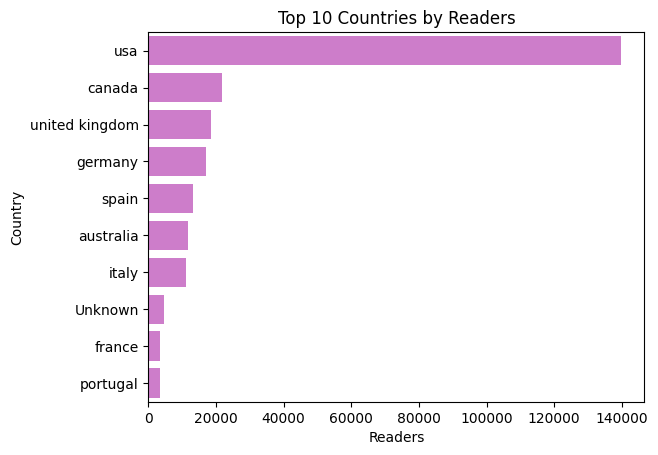

In [53]:
top_countries = users["Country"].value_counts().head(10)
top_countries = top_countries.reset_index()
top_countries.columns = ["Country", "Readers"]

sns.barplot(x="Readers", y="Country", data=top_countries, errorbar=None, color="orchid")
plt.title("Top 10 Countries by Readers")
plt.xlabel("Readers")
plt.ylabel("Country")
plt.show()

#### Age groups and their preferred Authors

       AgeGroup    Book-Author  Book-Rating
79042       <18    R. L. Stine          348
4540        <18  Ann M. Martin          345
192399    18–25   Stephen King         1074
174617    18–25   Nora Roberts          671
293991    26–35   Stephen King         5687
276209    26–35   Nora Roberts         4234
377801    36–50   Nora Roberts         2256
395583    36–50   Stephen King         2191
479393    51–70   Nora Roberts         1089
497175    51–70   Stephen King          834
556724      70+   John Grisham           55
580985      70+   Nora Roberts           51 




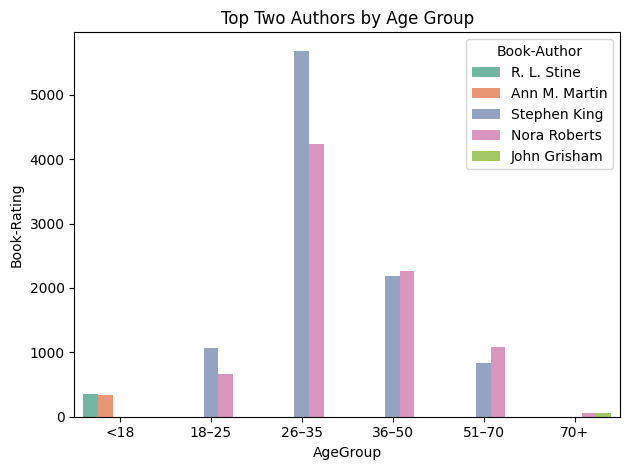

In [54]:
# creating a new column in user called AgeGroup
# putting ages into categories/bins
users["AgeGroup"] = pd.cut(users["Age"], 
                           bins=[0, 18, 25, 35, 50, 70, 100], 
                           labels=["<18", "18–25", "26–35", "36–50", "51–70", "70+"],
                           right=False)
# print(users.head(3), "\n\n")

# creating a table that will have 
# userid, isbn, book-rating from ratings tables JOINED ON
# userid, age, agegroup from users tables JOINED ON
# isbn and author from books table
merge_all_tables = ratings.merge(users[["User-ID", "Age", "AgeGroup"]], on="User-ID").merge(books[["ISBN", "Book-Author"]], on="ISBN", how="left")
#print(merge_all_tables.head(3), "\n\n")

# counting how many ratings each author got in each agegroup
author_counts = merge_all_tables.groupby(["AgeGroup", "Book-Author"], observed=False)["Book-Rating"].count().reset_index()
#print(author_counts.head(5), "\n\n")

# sorting author counts by highest to lowest
top_authors = author_counts.sort_values(["AgeGroup", "Book-Rating"], ascending=[True, False]) \
                           .groupby("AgeGroup", observed=False).head(2)

print(top_authors, "\n\n")

# Show it in a chart
sns.barplot(data=top_authors, x="AgeGroup", y="Book-Rating", hue="Book-Author", palette="Set2")
plt.title("Top Two Authors by Age Group")
plt.tight_layout()
plt.show()

Although this chart was mainly made to show the top two authors for each age group, it actually tells us two things at once.

1. Top Authors by Age Group
We can see which authors are most popular in each age range.

Like Stephen King being a favourite among 26–35 year olds, and Nora Roberts populat among most age groups.

3. Reading Activity by Age Group (Roughly)
Just by looking at the height of the bars we also get a rough idea of which age groups are more active in reading or in rating books.

For example, the 26–35 group has the tallest bars, which shows they might be the most engaged readers. 

The younger and older age groups are a bit less active (can mean one of two things, they dont read much or dont rate much).

## 7. Do Different Countries Love the Same Books?

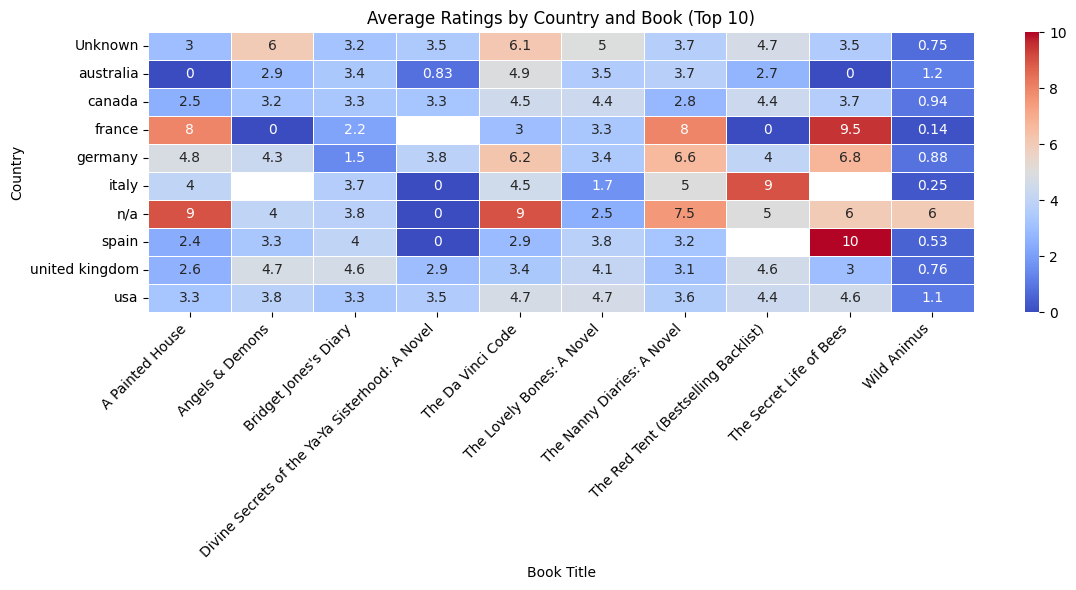

In [55]:
# merge all tables
merged = ratings.merge(users, on="User-ID").merge(books[["ISBN", "Book-Title"]], on="ISBN", how="left")

# find top countrues and books from the merged table
top_countries = merged["Country"].value_counts().head(10).index
top_books = merged["Book-Title"].value_counts().head(10).index

# get only top countries and books
top10 = merged[merged["Country"].isin(top_countries) & merged["Book-Title"].isin(top_books)]

# group the top10 and get average ratings
group_top10 = top10.groupby(["Country", "Book-Title"])["Book-Rating"].mean().reset_index()

# heatmap requires reshaping 
heatmap_table = group_top10.pivot(index="Country", columns="Book-Title", values="Book-Rating")

# Step 6: Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_table, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Average Ratings by Country and Book (Top 10)")
plt.xlabel("Book Title")
plt.ylabel("Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 8. Book Recommeder
##### Confused on what book to read? Try my recommender.

In [ ]:
# joining ratings and books tables
merged2 = ratings.merge(books[["ISBN", "Book-Title", "Book-Author"]], on="ISBN", how="left")

# Filter only meaningful ratings
# merged2 = merged2[merged2["Book-Rating"] > 0]
# print(merged2.isna().sum()) 

# many rows had missing author and title (because some ISBN's in ratings are not in boooks table)
merged2 = merged2.dropna(subset=["Book-Author"])
#print(merged2.isna().sum()) 

# questions
favourite_author = input("Who's your favourite author? ") #Nora Roberts
min_rating = int(input("Minimum rating you'd consider (1-10)? "))

# recommendations
recommendations = merged2[merged2["Book-Author"].str.contains(favourite_author)]
recommendations = recommendations.groupby(["Book-Title", "Book-Author"])["Book-Rating"].mean().reset_index()
recommendations = recommendations[recommendations["Book-Rating"] >= min_rating]
recommendations = recommendations.sort_values(by="Book-Rating", ascending=False)

# show top 5 recommendatosns
print("\nRecommended Books for You:\n")
print(recommendations.head(5))

#### Thanks for checking out my notebook. 
#### It was fun exploring what people read, where they're from and which authors different age groups prefer.
#### Hope you found something interesting. 